# Lab 2: More ggplot and dplyr


## Review : Lab 1 Exercise
    1. What is the default value of the mean and standard deviation used by the ``rnorm'' function in R to generate a value from a normal distribution?
    2. Create a boxplot of `price' grouped by the levels in the `cut' variable.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



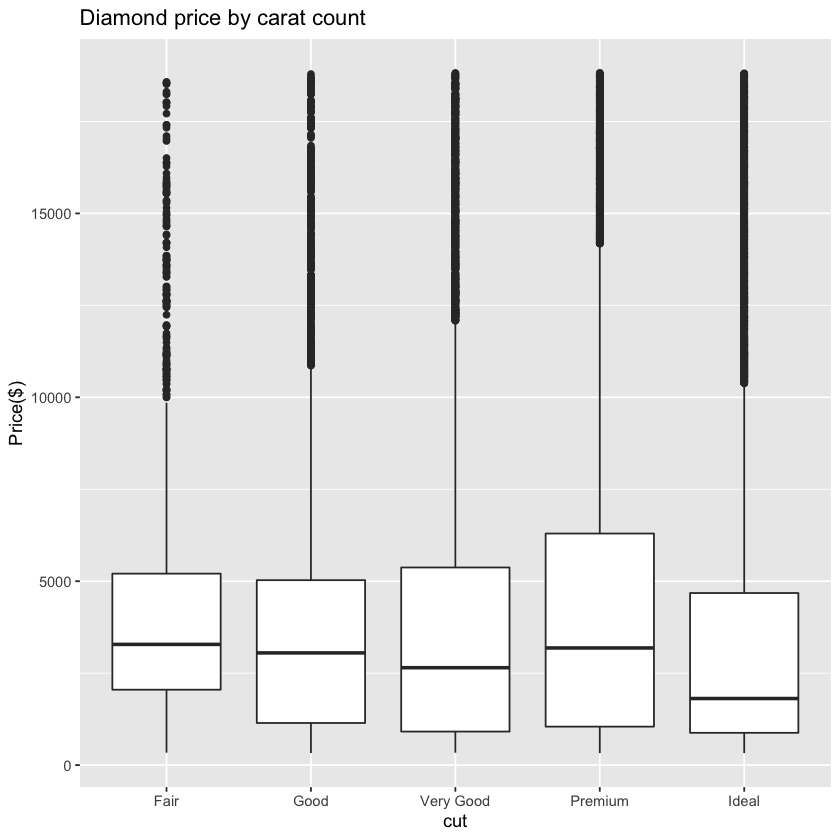

In [2]:
# boxplot helps to visualize the variability of a price for each cut
ggplot(data = diamonds) + 
    geom_boxplot(mapping = aes(x = cut, y = price)) +
    labs(x = 'cut', y = 'Price($)') + 
    ggtitle('Diamond price by carat count')

### Facets
    If we want more segmented plots

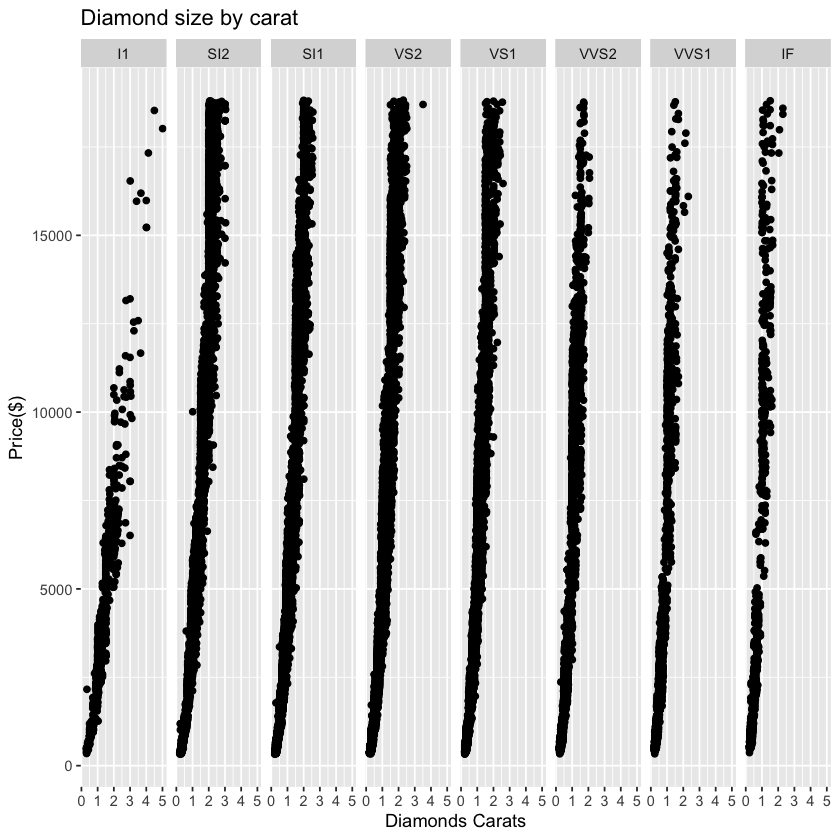

In [3]:
ggplot(data = diamonds) + 
    geom_point(mapping = aes(x = carat, y = price)) +
    labs(x = 'Diamonds Carats', y = 'Price($)') +
    ggtitle('Diamond size by carat') + 
    facet_grid(.~clarity) 


## Subset generation

In [4]:
rand_idx = floor(runif(1000, min=1, max=dim(diamonds)[1]))
dm = diamonds[rand_idx, ]
print(names(dm))
print(dim(dm))

 [1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"      
[1] 1000   10


In [5]:
summary(dm)

     carat               cut      color      clarity        depth      
 Min.   :0.2000   Fair     : 30   D:125   SI1    :260   Min.   :55.30  
 1st Qu.:0.3900   Good     : 88   E:197   VS2    :220   1st Qu.:61.00  
 Median :0.7000   Very Good:214   F:176   SI2    :155   Median :61.80  
 Mean   :0.7817   Premium  :278   G:214   VS1    :152   Mean   :61.76  
 3rd Qu.:1.0400   Ideal    :390   H:148   VVS2   : 98   3rd Qu.:62.50  
 Max.   :3.0000                   I: 83   VVS1   : 65   Max.   :70.60  
                                  J: 57   (Other): 50                  
     table           price               x               y        
 Min.   :52.00   Min.   :  360.0   Min.   :3.830   Min.   :3.840  
 1st Qu.:56.00   1st Qu.:  925.2   1st Qu.:4.688   1st Qu.:4.707  
 Median :57.00   Median : 2272.0   Median :5.655   Median :5.645  
 Mean   :57.38   Mean   : 3782.3   Mean   :5.695   Mean   :5.696  
 3rd Qu.:59.00   3rd Qu.: 5305.2   3rd Qu.:6.532   3rd Qu.:6.520  
 Max.   :65.00   Max. 

## More about Facets

![Caption for the picture.](./graph1.png)

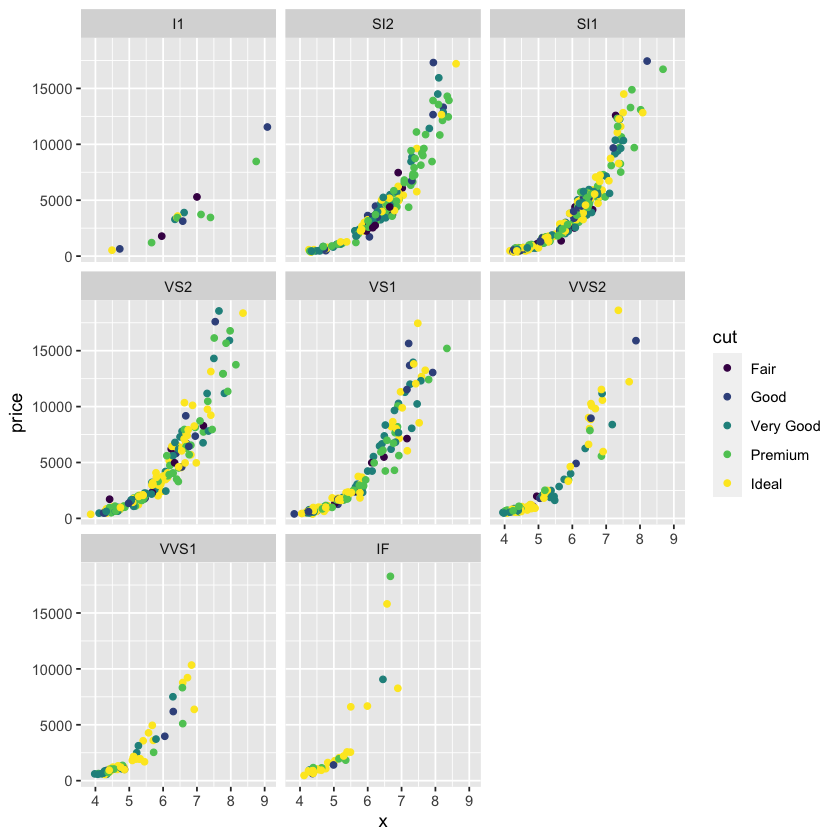

In [6]:
p1 = ggplot(data = dm) + 
    geom_point(mapping = aes(x = x, y = price, color = cut)) + 
    facet_wrap(~clarity)
print(p1)

## geom_smooth
    So far we have plotted the points in a fundamental manner. We might be interested in the linear trends of the data that we have.

![Caption for the picture.](./graph2.png)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



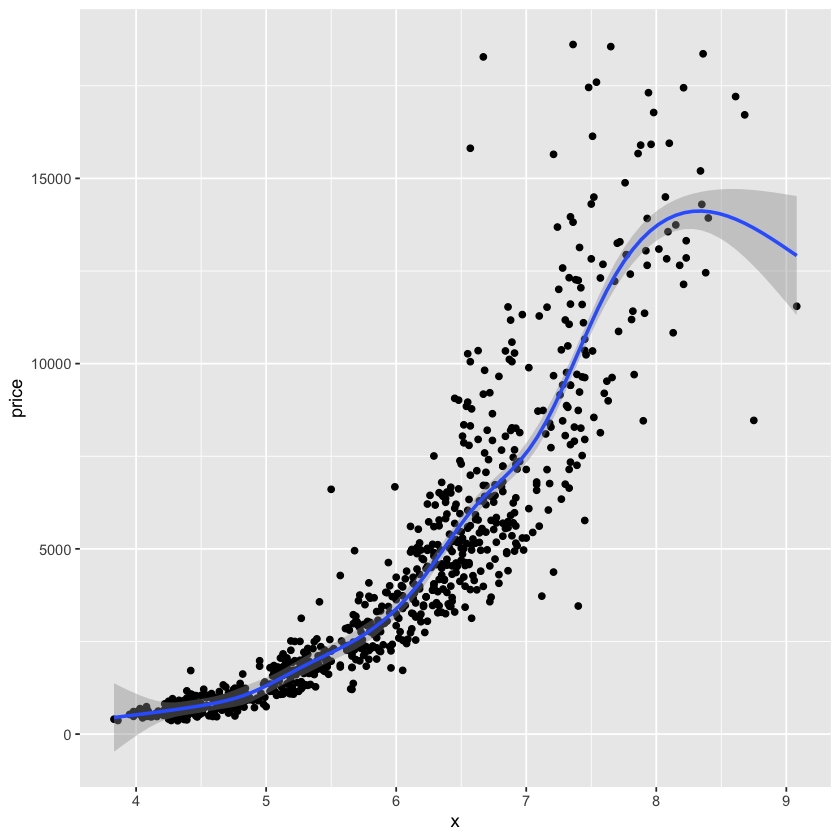

In [7]:
p2 = ggplot(data = dm) + 
    geom_point(mapping = aes(x = x, y = price)) +
    geom_smooth(mapping = aes(x = x, y = price))
print(p2)


    How to reduce the code duplication above? "(x=x, y=price)" is in both lines. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



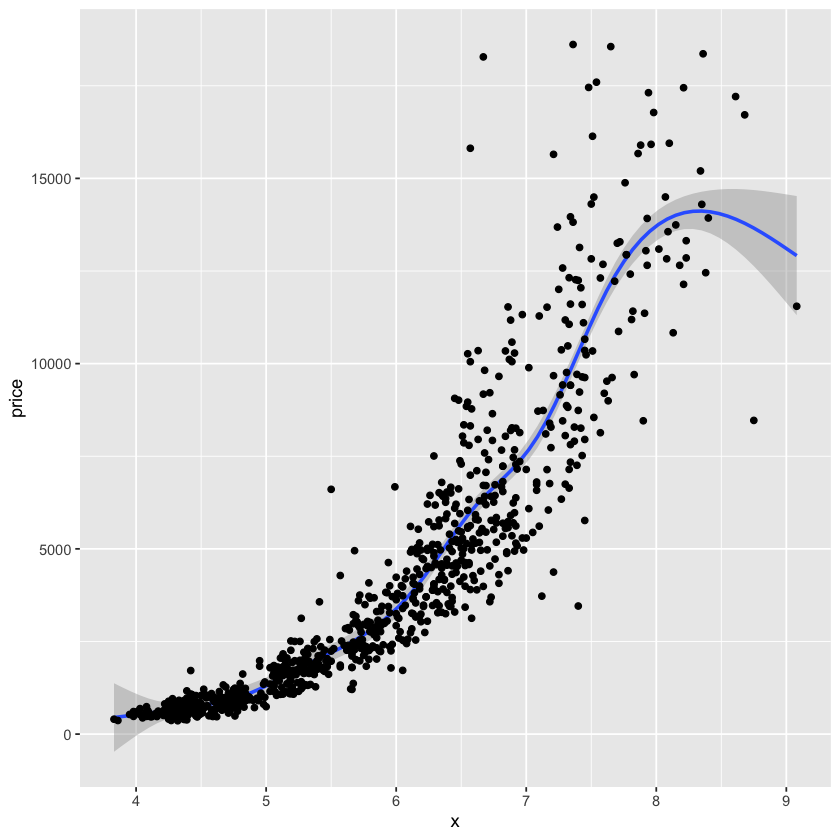

In [8]:
ggplot(data = dm, mapping = aes(x = x, y= price)) + 
  geom_smooth() +   geom_point()

## Geometric Plots
    Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

    You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, ?geom_bar shows that the default value for stat is 'count', which means that geom_bar() uses stat_count().

    stat_count() is documented on the same page as geom_bar(), and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.

    Let's use the following case where we override the default stat and instead want to use a value within the dataset of the y-axis (instead of a count).


In [9]:
popn <- tribble(
~country, ~population,
"ETHIOPIA", 102000000,
"NIGERIA", 186000000,
"EGYPT", 96000000,
"DR CONGO", 78000000,
"SOUTH AFRICA", 56000000
)

![Caption for the picture.](./graph5.png)

$title
[1] "Most populous countries in Africa"

attr(,"class")
[1] "labels"

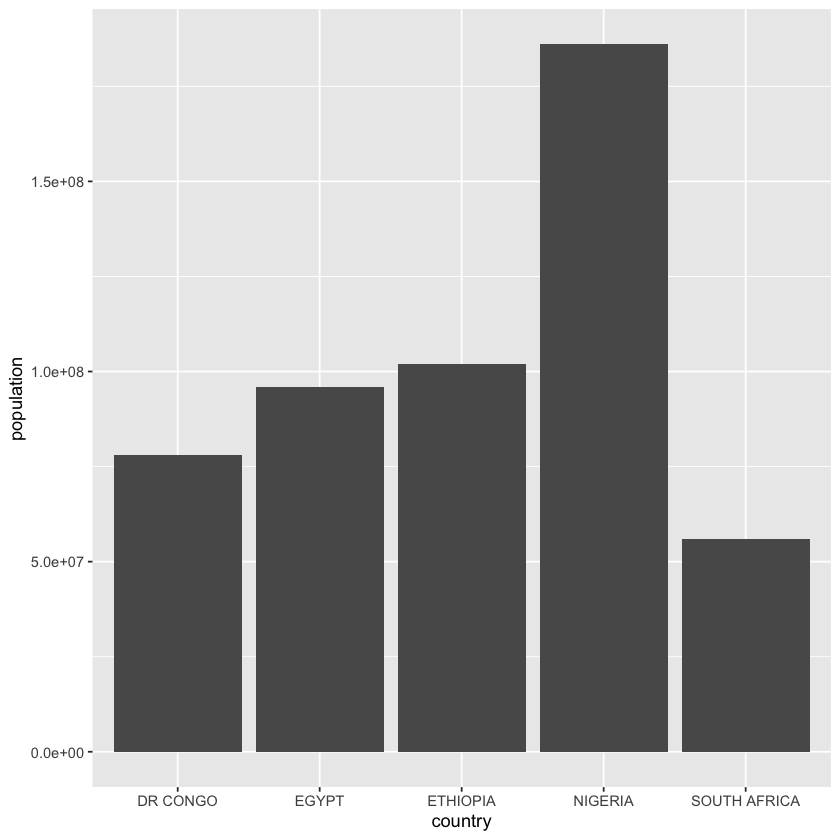

In [10]:
ggplot(data = popn) +
  geom_bar(mapping = aes(x = country, y = population), stat = "identity")
  ggtitle('Most populous countries in Africa')

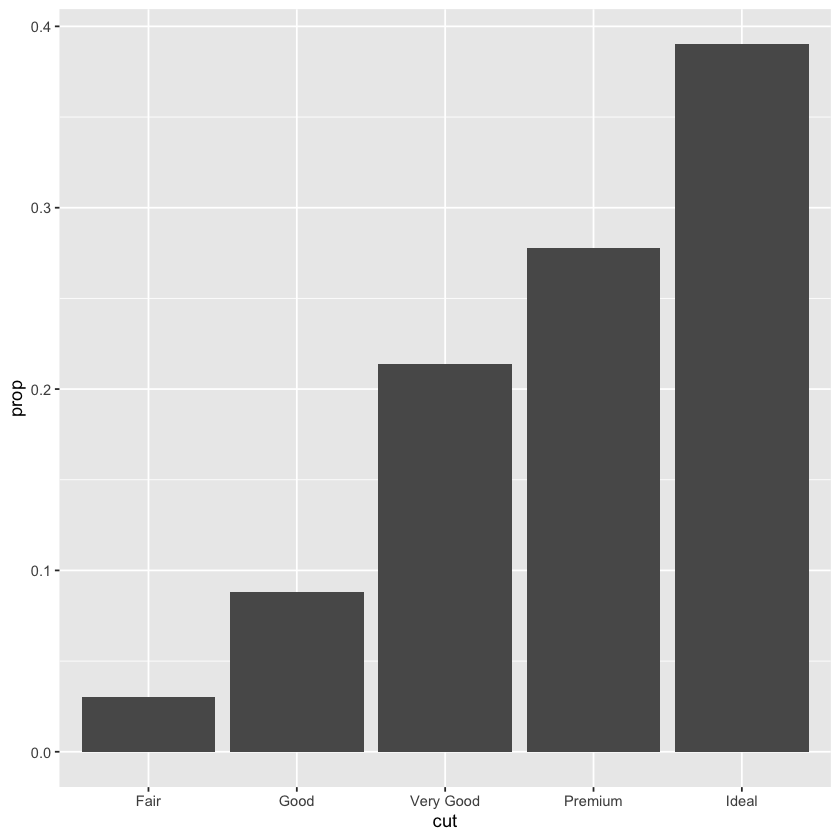

In [11]:
ggplot(data = dm) + 
    geom_bar(mapping = aes(x=cut, y=..prop.., group=1))

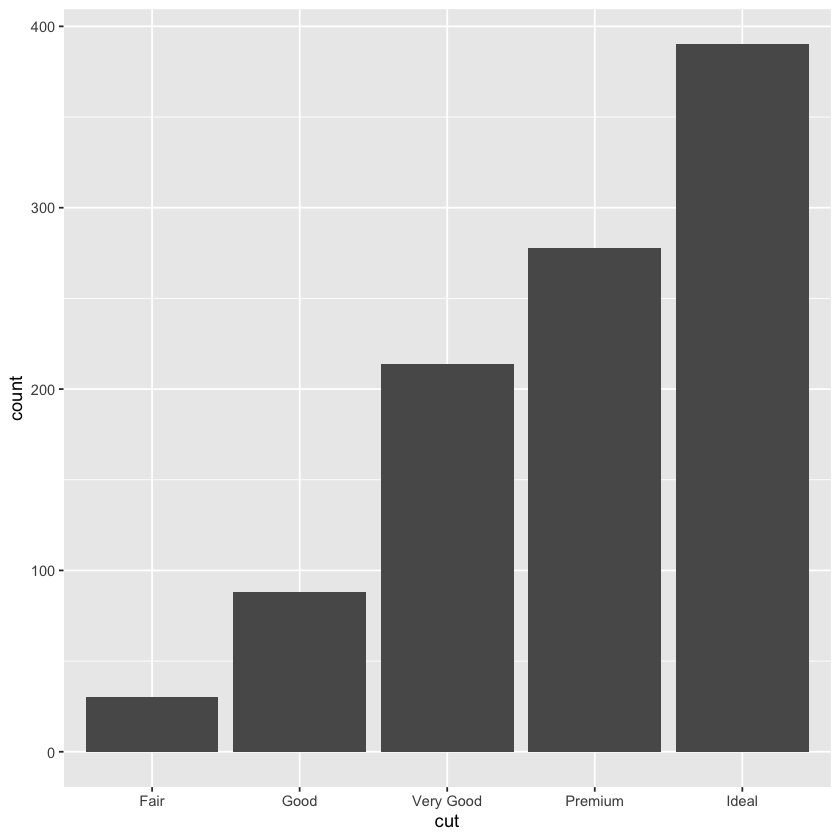

In [12]:
ggplot(data = dm) +
    stat_count(mapping = aes(x = cut))

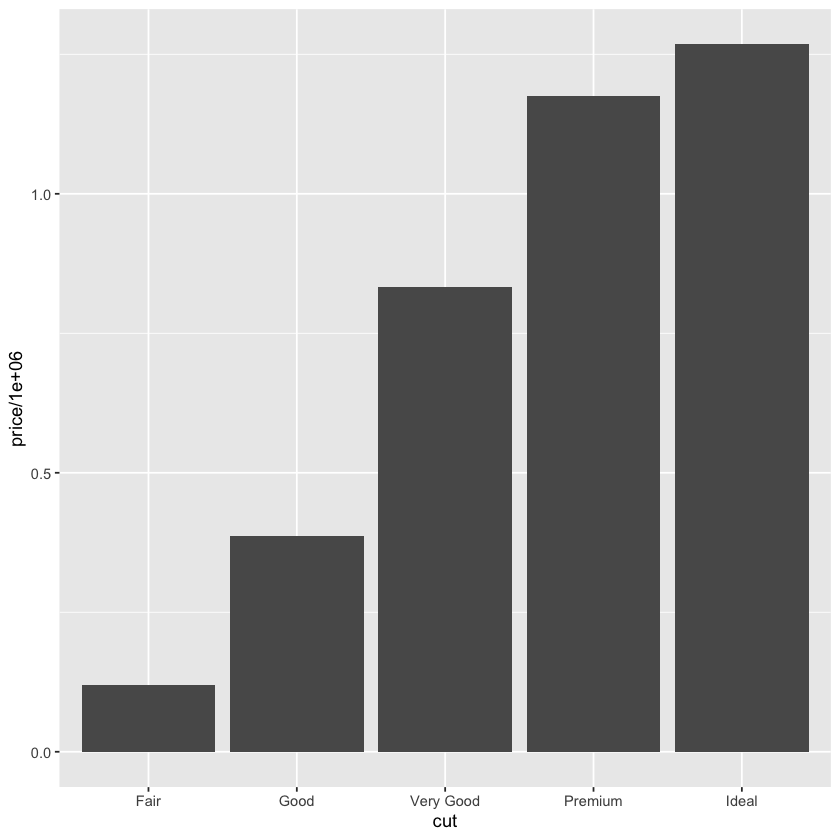

In [13]:
ggplot(data = dm) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

## Position adjustments

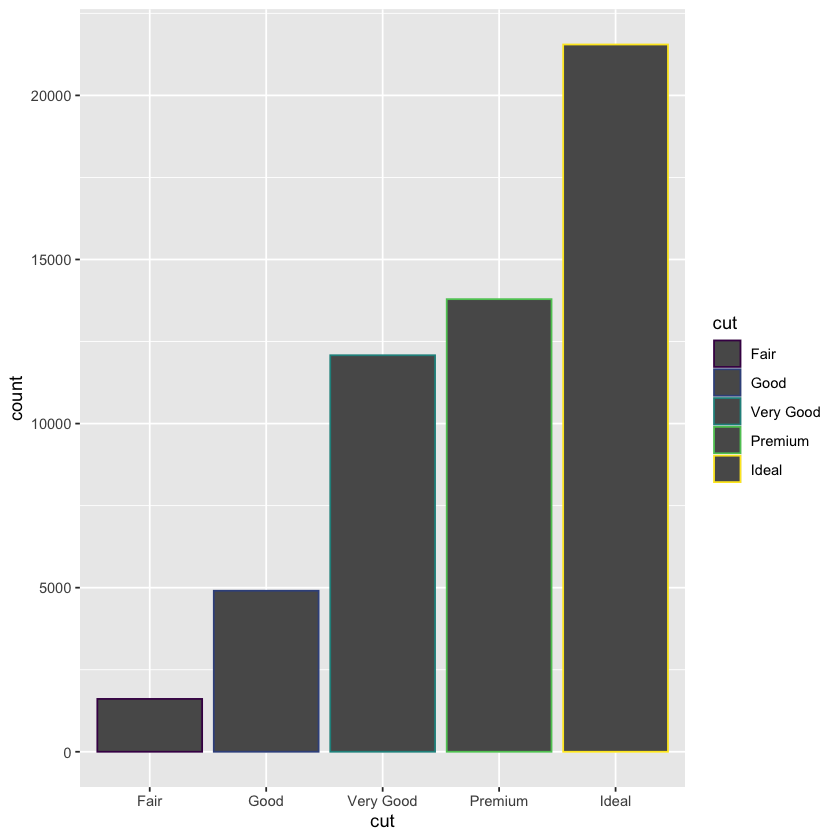

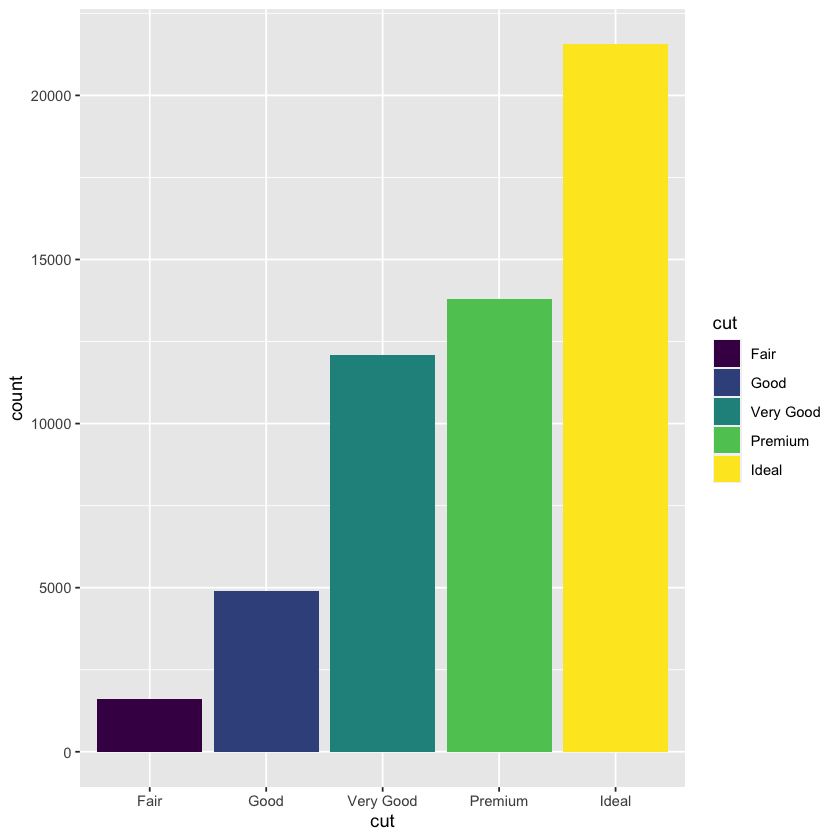

In [15]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remmeber that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

![Caption for the picture.](./graph7.png)

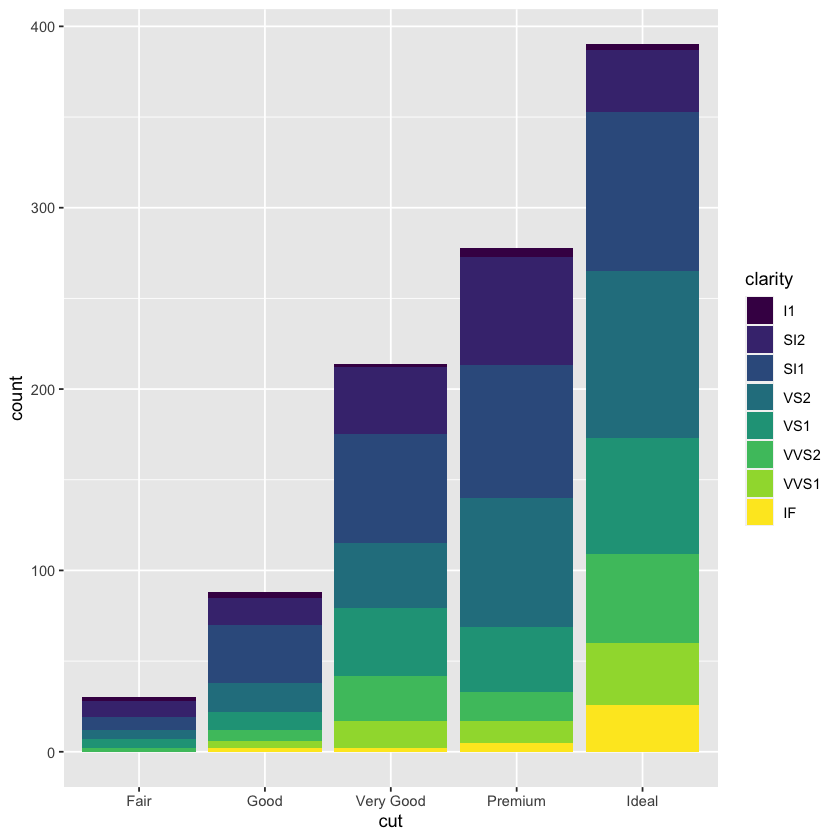

In [16]:
ggplot(data = dm) +
    geom_bar(mapping = aes(x = cut, fill = clarity)) # this "fill" is different from the following one.

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

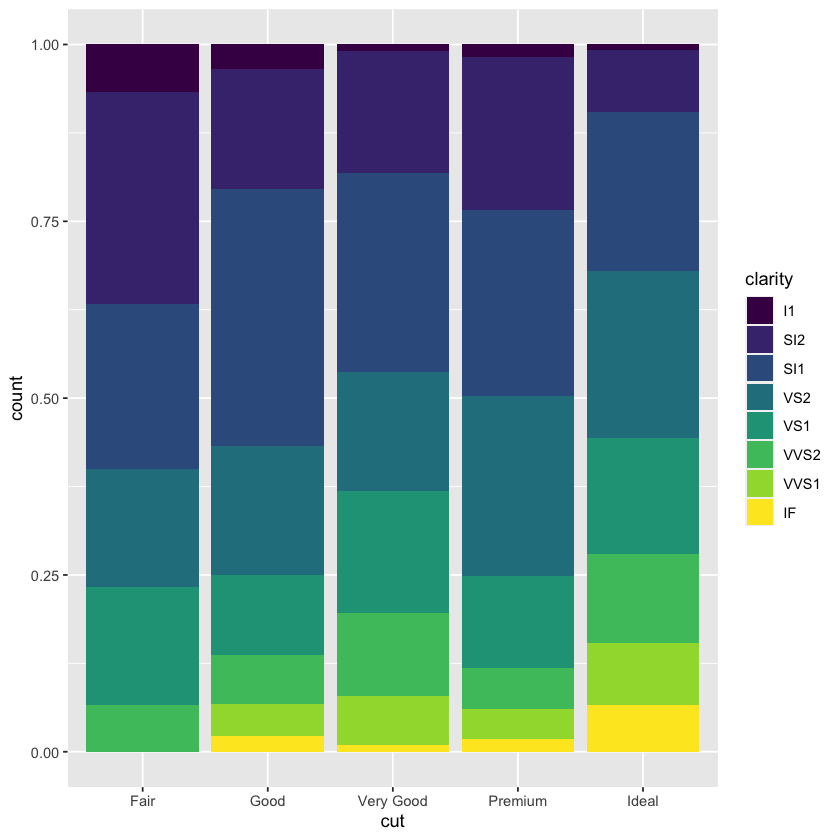

In [17]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

*position = 'dodge'*

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

![Caption for the picture.](graph10.png)

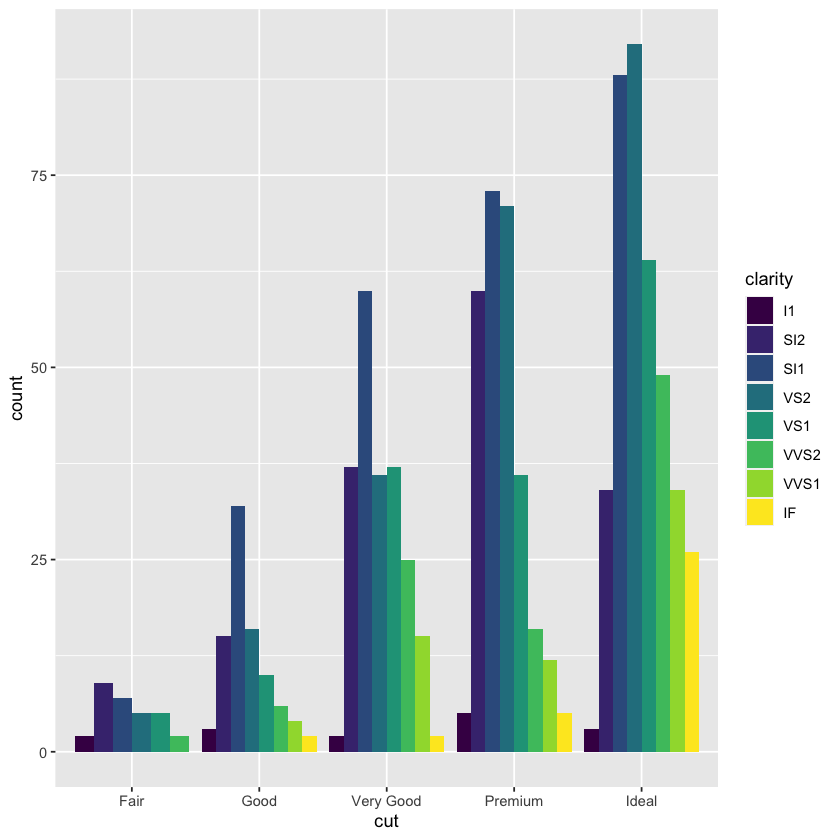

In [18]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

A positional adjustment that is very useful for scatterplots with overlaps is the 'jitter' argument.

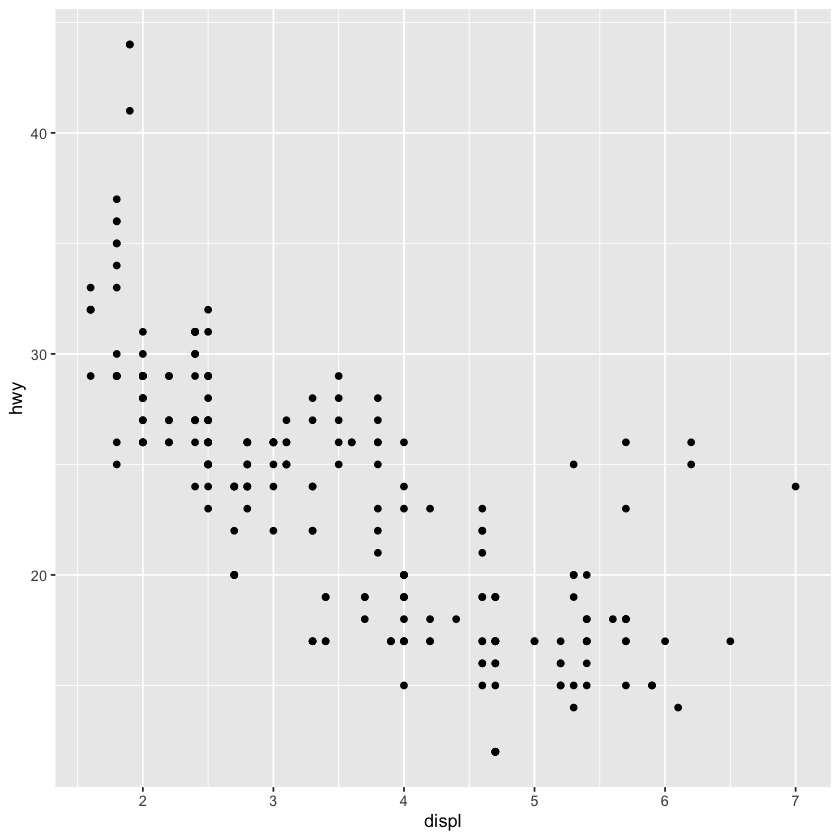

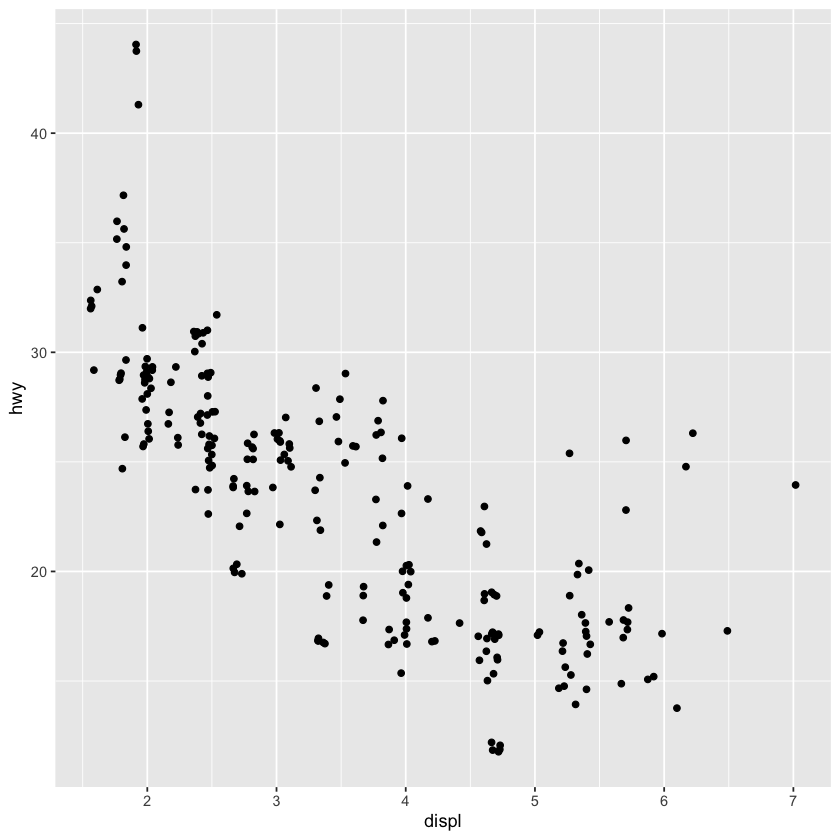

In [19]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")



# dplyr for data manipulation

In [20]:
dim(dm)
head(dm)

[1] 1000   10

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.9,Premium,G,SI2,62.1,58,3246,6.13,6.08,3.79
0.7,Very Good,G,VVS2,62.9,59,2848,5.61,5.68,3.55
0.4,Ideal,H,IF,61.9,55,1074,4.76,4.77,2.95
0.3,Premium,E,SI1,59.8,60,526,4.31,4.35,2.59
0.3,Ideal,G,VS1,62.6,57,776,4.29,4.27,2.68
0.5,Ideal,G,VVS1,62.2,56,2070,5.12,5.10,3.18


Simply run 'dm' after declaring the dm variable above. can you guess what 'dbl', 'ord', and 'int' are?

Notice how the levels below follow an order. Indeed, we expect Fair < Good < Very Good < Premium < Ideal

In [21]:
print(levels(dm$cut))
print(levels(dm$color))
print(levels(dm$clarity))

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"    
[1] "D" "E" "F" "G" "H" "I" "J"
[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"  


In [22]:
sizes = c("M", "S", "S", "M", "XL", "XXL", "XL", "S", "M", "L")
sizes

[1] "M"   "S"   "S"   "M"   "XL"  "XXL" "XL"  "S"   "M"   "L"

In [23]:
sizes = ordered(sizes, levels = c("S", "M", "L", "XL", "XXL"))
levels(sizes) # in R Studio, this will output the ordering explicitly with less-than signs

[1] "S"   "M"   "L"   "XL"  "XXL"

There are five functions in dplyr: filter, arrange, select, mutate and summarise. all of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names( without quotes).
3. The result is a new data frame.

## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [24]:
filter(dm, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.21,Fair,J,SI1,65.3,60,4147,6.60,6.51,4.28
0.96,Fair,J,SI1,67.3,56,2517,6.06,6.01,4.06
1.51,Fair,J,VS1,65.2,56,7139,7.16,7.11,4.65
1.13,Fair,J,SI1,64.9,55,4123,6.49,6.56,4.24
0.90,Fair,J,SI2,66.6,54,2536,6.05,5.99,4.01


Usually you want to store the newly subsetted data in memory. 

In [25]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [26]:
4 == 6
test = 6
test
test == 5


[1] FALSE

[1] 6

[1] FALSE

## Use cases

In [27]:
a = filter(dm, color == 'D' | color == 'J') 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm, color == 'D' & color == 'J') 
# filtering for rows that satisfy both conditions

best_cuts = filter(dm, cut == 'Ideal') 
# filtering using membership condition

not_worst_cuts = filter(dm, cut > 'Fair') 
# can do this because cut is an ordinal variable

In [28]:
not_worst_cuts[1:20,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.90,Premium,G,SI2,62.1,58,3246,6.13,6.08,3.79
0.70,Very Good,G,VVS2,62.9,59,2848,5.61,5.68,3.55
0.40,Ideal,H,IF,61.9,55,1074,4.76,4.77,2.95
0.30,Premium,E,SI1,59.8,60,526,4.31,4.35,2.59
0.30,Ideal,G,VS1,62.6,57,776,4.29,4.27,2.68
0.50,Ideal,G,VVS1,62.2,56,2070,5.12,5.10,3.18
0.55,Ideal,F,SI1,61.8,55,1415,5.27,5.22,3.24
0.41,Good,E,SI1,63.9,58,755,4.70,4.72,3.01
0.70,Very Good,H,SI1,59.2,59,2018,5.79,5.86,3.45


In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [29]:
x = 4
x == NA
is.na(x)

[1] NA

[1] FALSE

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [30]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

# A tibble: 3 x 1
      x
  <dbl>
1     1
2    NA
3     3


In [31]:
filter(df, x>1)

x
<dbl>
3


In [32]:
filter(df, is.na(x) | x > 1)

x
<dbl>
NA
3


## Arrange
Useful for ordering rows instead of filtering for a subset of them

In [33]:
arrange(dm, cut, color)[1:20,] 
# can be done since clarity is an ordinal variable

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.50,Fair,D,VVS2,67.6,57,1980,4.95,4.84,3.31
1.50,Fair,D,SI2,68.8,57,7469,6.90,6.86,4.73
1.02,Fair,D,SI1,70.6,57,4398,6.08,6.01,4.27
1.43,Fair,E,SI2,66.0,57,6086,7.02,7.00,4.63
0.40,Fair,E,VVS2,57.3,60,1069,4.84,4.89,2.79
1.54,Fair,E,SI1,64.7,56,12581,7.28,7.22,4.69
1.01,Fair,E,VS2,64.8,59,4972,6.34,6.26,4.08
1.00,Fair,F,VS2,64.9,52,6210,6.24,6.33,4.08
0.60,Fair,F,SI1,55.3,63,1367,5.67,5.61,3.12


In [34]:
# arranging in the descending order of carat and then cut
arrange(dm,desc(carat), cut)[1:20,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3.00,Good,E,I1,64.2,65,11548,9.08,8.96,5.79
2.61,Ideal,J,SI2,64.6,55,17209,8.61,8.57,5.55
2.50,Premium,H,I1,59.9,60,8467,8.75,8.67,5.22
2.48,Premium,I,SI1,61.0,60,16715,8.68,8.61,5.27
2.23,Premium,J,SI2,61.3,60,13931,8.40,8.35,5.13
2.22,Ideal,I,VS2,61.3,56,18363,8.36,8.45,5.15
2.21,Premium,H,SI2,61.3,60,14299,8.35,8.33,5.11
2.20,Premium,J,VS1,61.7,59,15201,8.34,8.30,5.13
2.18,Very Good,J,SI2,62.6,58,12853,8.23,8.25,5.16


Missing values are always sorted at the end:

In [35]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
<dbl>
2
5
NA


In [36]:
arrange(df, desc(x))

x
<dbl>
5
2
NA


## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [37]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [38]:
select(dm, carat, price)[1:20,]

carat,price
<dbl>,<int>
0.90,3246
0.70,2848
0.40,1074
0.30,526
0.30,776
0.50,2070
0.55,1415
0.41,755
0.70,2018


In [39]:
select(dm, carat:price)[1:20,]

carat,cut,color,clarity,depth,table,price
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>
0.90,Premium,G,SI2,62.1,58,3246
0.70,Very Good,G,VVS2,62.9,59,2848
0.40,Ideal,H,IF,61.9,55,1074
0.30,Premium,E,SI1,59.8,60,526
0.30,Ideal,G,VS1,62.6,57,776
0.50,Ideal,G,VVS1,62.2,56,2070
0.55,Ideal,F,SI1,61.8,55,1415
0.41,Good,E,SI1,63.9,58,755
0.70,Very Good,H,SI1,59.2,59,2018


In [40]:
select(dm, -(carat:price))[1:20,]

x,y,z
<dbl>,<dbl>,<dbl>
6.13,6.08,3.79
5.61,5.68,3.55
4.76,4.77,2.95
4.31,4.35,2.59
4.29,4.27,2.68
5.12,5.10,3.18
5.27,5.22,3.24
4.70,4.72,3.01
5.79,5.86,3.45


Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [41]:
rename(dm, width=x)[1:20,]

carat,cut,color,clarity,depth,table,price,width,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.90,Premium,G,SI2,62.1,58,3246,6.13,6.08,3.79
0.70,Very Good,G,VVS2,62.9,59,2848,5.61,5.68,3.55
0.40,Ideal,H,IF,61.9,55,1074,4.76,4.77,2.95
0.30,Premium,E,SI1,59.8,60,526,4.31,4.35,2.59
0.30,Ideal,G,VS1,62.6,57,776,4.29,4.27,2.68
0.50,Ideal,G,VVS1,62.2,56,2070,5.12,5.10,3.18
0.55,Ideal,F,SI1,61.8,55,1415,5.27,5.22,3.24
0.41,Good,E,SI1,63.9,58,755,4.70,4.72,3.01
0.70,Very Good,H,SI1,59.2,59,2018,5.79,5.86,3.45


In [42]:
select(dm, width = x)[1:20,]

width
<dbl>
6.13
5.61
4.76
4.31
4.29
5.12
5.27
4.70
5.79


Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dtaframe

In [43]:
select(dm, price, carat, everything())[1:20,]

price,carat,cut,color,clarity,depth,table,x,y,z
<int>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3246,0.90,Premium,G,SI2,62.1,58,6.13,6.08,3.79
2848,0.70,Very Good,G,VVS2,62.9,59,5.61,5.68,3.55
1074,0.40,Ideal,H,IF,61.9,55,4.76,4.77,2.95
526,0.30,Premium,E,SI1,59.8,60,4.31,4.35,2.59
776,0.30,Ideal,G,VS1,62.6,57,4.29,4.27,2.68
2070,0.50,Ideal,G,VVS1,62.2,56,5.12,5.10,3.18
1415,0.55,Ideal,F,SI1,61.8,55,5.27,5.22,3.24
755,0.41,Good,E,SI1,63.9,58,4.70,4.72,3.01
2018,0.70,Very Good,H,SI1,59.2,59,5.79,5.86,3.45


There are some helper functions for select():
    starts_with()
    ends_with()
    contains()

### Mutate
to create a computed column

In [44]:
dm_dimensions = select(dm, 
  -(carat:price)
)
mutate(dm_dimensions,
  volume = x*y*z
)[1:20,]

x,y,z,volume
<dbl>,<dbl>,<dbl>,<dbl>
6.13,6.08,3.79,141.25482
5.61,5.68,3.55,113.12004
4.76,4.77,2.95,66.98034
4.31,4.35,2.59,48.55861
4.29,4.27,2.68,49.09304
5.12,5.10,3.18,83.03616
5.27,5.22,3.24,89.13046
4.70,4.72,3.01,66.77384
5.79,5.86,3.45,117.05643


If you only want to keep the new variables, use transmute()

In [45]:
transmute(dm_dimensions, 
          volume = x*y*z)[1:20,]

volume
<dbl>
141.25482
113.12004
66.98034
48.55861
49.09304
83.03616
89.13046
66.77384
117.05643



## Summarise
Generally used in concert with group_by() function to output summaries by group. Group summaries are seen in many applications

In [46]:
by_color = group_by(dm, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



color,avg_price
<ord>,<dbl>
D,3179.656
E,3080.959
F,3732.886
G,3574.958
H,4146.257
I,5222.096
J,5417.842


In [47]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [48]:
mpg2 = mpg
mpg2$year = as.factor(mpg$year) # telling it we're dealing with a category column
mpg2 = mutate(mpg2, manual = (grepl('manual', trans)))
head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
<chr>,<chr>,<dbl>,<fct>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [49]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
hwy_summary

`summarise()` regrouping output by 'manufacturer' (override with `.groups` argument)



manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
honda,1999,5,31.60000,24.80000


In [50]:
hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


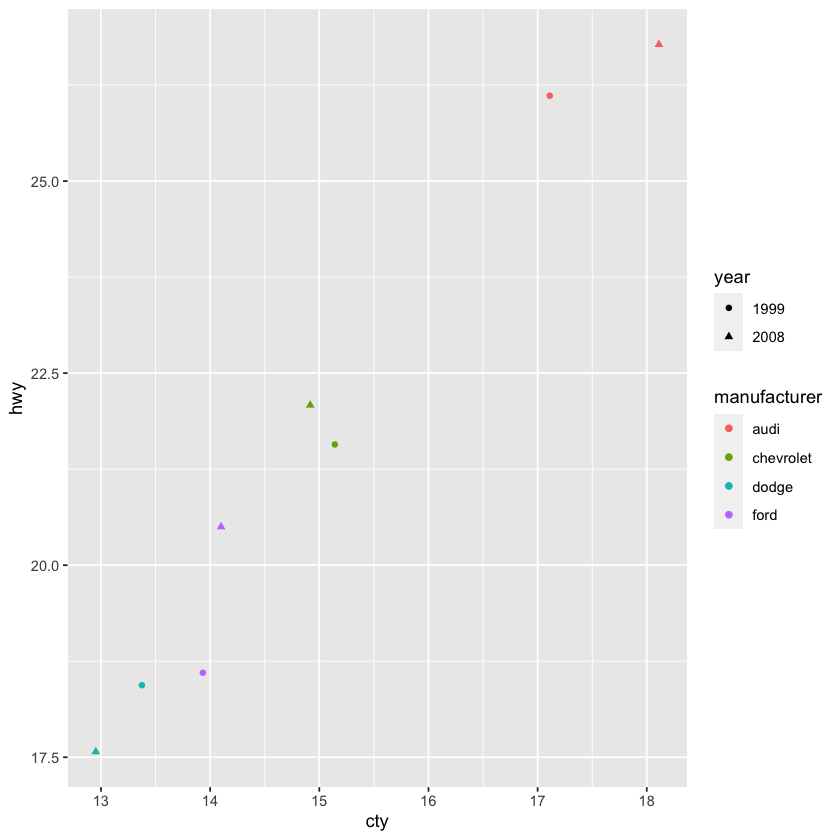

In [51]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
geom_point(mapping = aes(color = manufacturer, shape = year))

## Pipes
The transformations above can be written as:


In [52]:
hwy_summary_ag2 = mpg2 %>% 
group_by(manufacturer, year) %>%
summarise(
    count = n(),
    hwy = mean(hwy, na.rm = TRUE),
    cty = mean(cty, na.rm = TRUE)) %>%
filter(substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))

`summarise()` regrouping output by 'manufacturer' (override with `.groups` argument)



In [53]:
hwy_summary_ag2

manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
